<a href="https://colab.research.google.com/github/rohanbhavsar64/code1/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [83]:
data=pd.read_csv('diabetes_prediction_dataset.csv')
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [84]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: xlabel='diabetes', ylabel='age'>

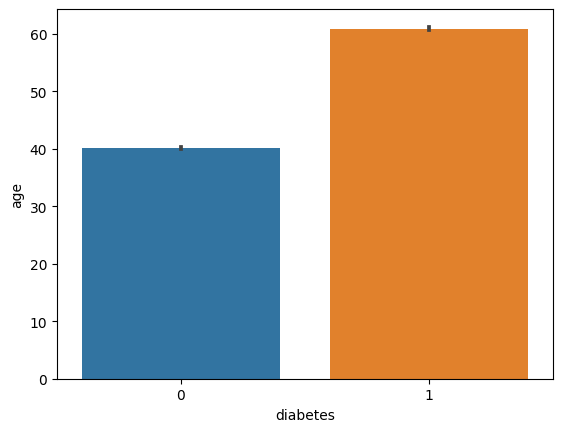

In [15]:
import seaborn as sns
sns.barplot(x="diabetes",y="age",data=data)

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

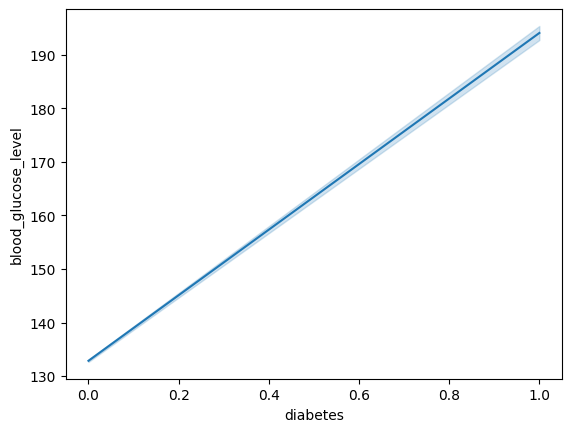

In [24]:
sns.lineplot(x="diabetes",y="blood_glucose_level",data=data)

(array([92515.,     0.,  7485.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <BarContainer object of 3 artists>)

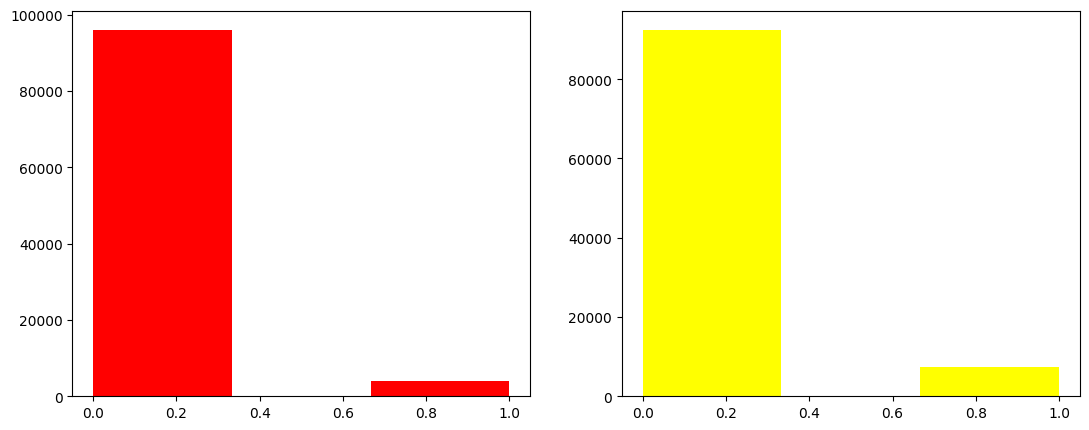

In [53]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.hist(data['heart_disease'],color='red',bins=3)
plt.subplot(1,2,2)
plt.hist(data['hypertension'],color='yellow',bins=3)

(array([35095.,     0., 35816.,     0.,  9286.,     0.,  9352.,     0.,
         4004.,     0.,  6447.]),
 array([0.        , 0.45454545, 0.90909091, 1.36363636, 1.81818182,
        2.27272727, 2.72727273, 3.18181818, 3.63636364, 4.09090909,
        4.54545455, 5.        ]),
 <BarContainer object of 11 artists>)

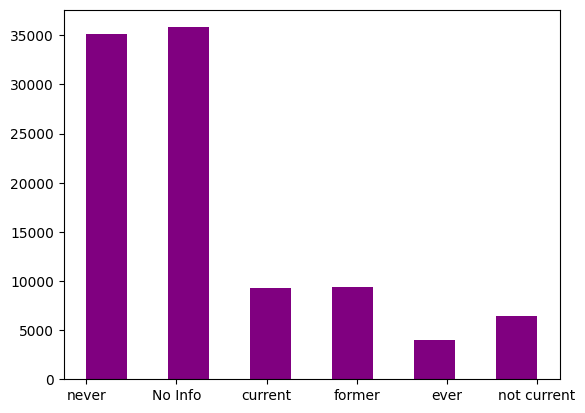

In [10]:
plt.hist(data['smoking_history'],color='purple',bins=11)

(array([5.8552e+04, 0.0000e+00, 4.1430e+04, 0.0000e+00, 1.8000e+01]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

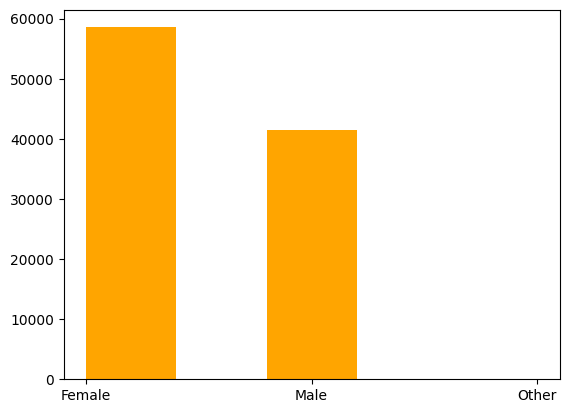

In [52]:
plt.hist(data['gender'],color='orange',bins=5)

<Axes: >

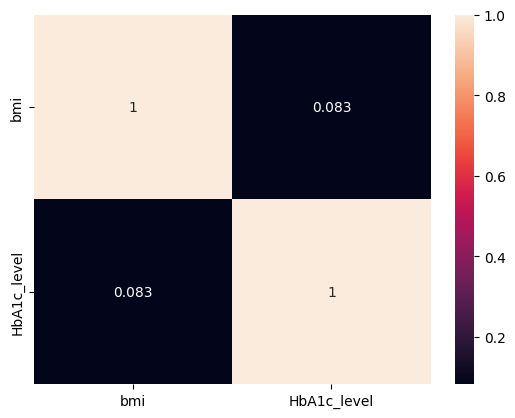

In [27]:
sns.heatmap(data[['bmi','HbA1c_level']].corr(),annot=True)

In [28]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

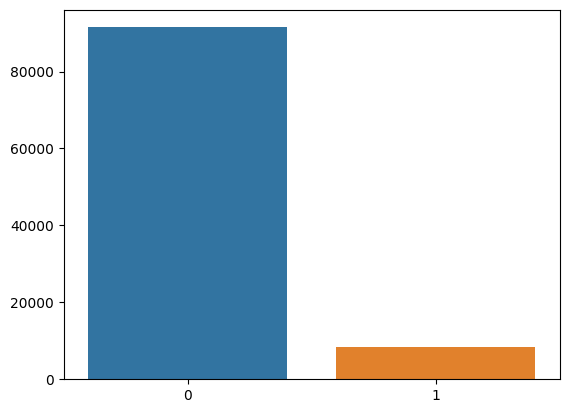

In [72]:
sns.barplot(x=list(data['diabetes'].value_counts().keys()),y=list(data['diabetes'].value_counts()))

In [68]:
data=pd.get_dummies(data,drop_first=True)
data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,0,0,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,0,0,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,1,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,0,0,0,0,0,1,0


In [38]:
x=data.drop('diabetes',axis=1)
y=data['diabetes']

In [62]:
from sklearn.model_selection import  train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=33,stratify=y)

In [78]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=30,sampling_strategy=0.85)
xres,yres=sm.fit_resample(xtrain,ytrain)

In [79]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
l.fit(xres,yres)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
l.score(xtest,ytest)

0.8942

In [81]:
y_pred=l.predict(xtest)

In [82]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(ytest,y_pred)
cf

array([[20728,  2147],
       [  498,  1627]])